# Exploring the BP Historical Dataset

## Our Business Context

To guide our analysis, we will focus on the following question:

*What is the historical wind production in New Zealand?*

This question is our **business context** - it will guide our work with this dataset.

For this project we are using the BP Historical Dataset - a dataset published each year by BP as part of their [Statistical Review of World Energy](https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html).

## Install Python Dependencies

In [1]:
!pip install -r ../requirements.txt -q


[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


## Load the BP Historical Dataset with Pandas

Let's start by using `pandas` to read our dataset from a URL into a `pd.DataFrame` called `raw`:

In [2]:
import pandas as pd

raw = pd.read_csv("https://raw.githubusercontent.com/ADGEfficiency/analyze-bp-historical-data/main/data/bp-stats-review-2022-consolidated-dataset-narrow-format.csv")

### Always Save the Raw Data

After reading our raw data, we should immediately save it to a file on the local hard disk. This has a few advantages:

1. it's quicker to load if we want to reload the raw data,
2. we have a copy in case we lose access to the original raw data through the URL.

In [ ]:
import pathlib
import pandas as pd

raw = pd.read_csv("https://raw.githubusercontent.com/ADGEfficiency/analyze-bp-historical-data/main/data/bp-stats-review-2022-consolidated-dataset-narrow-format.csv")

#  create a `pathlib.Path` for `./data`
cache = pathlib.Path("./data")

#  create the folder on disk
cache.mkdir(exist_ok=True)

#  write the raw data to a CSV file `raw.csv` in this folder
raw.to_csv(cache / "raw.csv")

This dataset is reasonably small (~10 MB as `.csv`) - for some internet connections, this is small enough for us to pay the cost of redownloading every time we need it.  When you are working with larger datasets, a cache becomes a must have.  A cache will let you develop code faster.

Let's create a new Python variable called `data`, which is a copy of our raw data:

In [3]:
data = raw.copy()

This let's us keep a copy of the raw data in Python memory as we work & transform the data.  It's a similar idea to the hard-disk cache - saving raw data as soon as we get it.

## Inspecting the Raw Data

Now we have our data as a `pd.DataFrame`, we can start to explore it. 

`pandas` includes a few useful methods that will create summary metrics of the entire dataset.

## Looking at Summaries

### Shape

The first is `.shape`, is an attribute that shows the number of rows and columns as a `tuple`:

In [4]:
data.shape

(277095, 12)

### Info and Describe

`.info()` is a method that shows the columns along with the amount of non-null (non missing) data:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277095 entries, 0 to 277094
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Country          277095 non-null  object 
 1   Year             277095 non-null  int64  
 2   ISO3166_alpha3   277095 non-null  object 
 3   ISO3166_numeric  193275 non-null  float64
 4   Region           193275 non-null  object 
 5   SubRegion        193275 non-null  object 
 6   OPEC             193275 non-null  float64
 7   EU               193275 non-null  float64
 8   OECD             193275 non-null  float64
 9   CIS              193275 non-null  float64
 10  Var              277095 non-null  object 
 11  Value            277095 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 25.4+ MB


`.describe()` is a method that shows an in-depth statistical summary of the data, including percentiles (25%, 50% and 75%):

In [6]:
data.describe()

,Year,ISO3166_numeric,OPEC,EU,OECD,CIS,Value
count,277095.000000,193275.000000,193275.000000,193275.000000,193275.000000,193275.000000,277095.000000
mean,1996.581479,449.713295,0.103200,0.282623,0.453297,0.056510,567.504734
std,15.400751,259.786720,0.304221,0.450276,0.497815,0.230905,3741.758624
min,1965.000000,12.000000,0.000000,0.000000,0.000000,0.000000,-1.623892
25%,1985.000000,208.000000,0.000000,0.000000,0.000000,0.000000,0.082410
50%,1998.000000,428.000000,0.000000,0.000000,0.000000,0.000000,4.595522
75%,2010.000000,703.000000,0.000000,1.000000,1.000000,0.000000,73.445450
max,2021.000000,894.000000,1.000000,1.000000,1.000000,1.000000,339208.700000


`.describe()` will only show us statistics for numeric columns - note that our `Var` column is not present in `.describe()`.

## Looking at Individual Samples

### Looking at Columns

Let's first start by looking at what columns we have in this dataset:

In [7]:
data.columns

Index(['Country', 'Year', 'ISO3166_alpha3', 'ISO3166_numeric', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'Var', 'Value'], dtype='object')

We can inspect a few columns alone using the `[]` syntax to select columns:

In [8]:
data[["Country", "Region"]].sample(3)

,Country,Region
3980,Total Non-OECD,NaN
82049,Bangladesh,Asia Pacific
162163,Other Northern Africa,NaN


### Looking at Rows

Row based inspection methods are useful for showing small snapshots of the data.

We can inspect this data using `.head(3)` to look at the first three rows:

In [9]:
data.head(3)

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,Var,Value
0,Brazil,2004,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,0.000000
1,Brazil,2005,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,0.014737
2,Brazil,2006,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,1.016887


`.tail(3)` to look at the bottom three rows:

In [10]:
data.tail(3)

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,Var,Value
277092,Vietnam,2019,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,0.714780
277093,Vietnam,2020,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,1.063052
277094,Vietnam,2021,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,2.367697


We can inspect eight random rows using `.sample(8)`:

In [11]:
data.sample(8, random_state=5)

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,Var,Value
257857,Total Non-OECD,1986,T-NOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,solar_twh,0.000000
173742,Peru,2013,PER,604.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,oilcons_mt,9.988245
75632,Spain,1985,ESP,724.0,Europe,Europe,0.0,1.0,1.0,0.0,electbyfuel_ren_power,0.611000
4268,US,2006,USA,840.0,North America,North America,0.0,0.0,1.0,0.0,biofuels_cons_ej,0.474120
267031,Total Middle East,2012,T-ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wind_ej,0.002915
21869,Turkey,2006,TUR,792.0,Europe,Europe,0.0,0.0,1.0,0.0,biogeo_twh,0.147850
92332,Belgium,1995,BEL,56.0,Europe,Europe,0.0,1.0,1.0,0.0,gascons_ej,0.448292
146694,Algeria,1981,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,nuclear_ej,0.000000


From looking at this dataset, we can see that the `Var` and `Value` column are closely related - we can see from the `.sample` above, that we have measurement of different data such as solar production `solar_twh` or oil consumption `oilcons_mt`.

## What do our Columns Mean?

For any dataset we are working with, we should attempt to understand what each column means.  

For this dataset, some of the columns (such as `Country` or `Year`) are self-explanatory - the less explanatory columns mean the following:

- `ISO3166_alpha3` = the alphabetic code for a country using the [ISO 3166 standard](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes),
- `ISO3166_numeric` = the numeric code for a country using the [ISO 3166 standard](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes),
- `OPEC`, `EU`, `OECD`, `CIS` = binary or boolean flags indicating whether a country belongs to a group such as the Organization of the Petroleum Exporting Countries (OPEC), Europe (EU), the Organization for Economic Cooperation and Development (OECD) or the Commonwealth of Independent States (CIS),
- `Var` = the name of a variable/measurement,
- `Value` the value of a variable/ measurement.

The use of the `Var` and `Value` columns is known as a *key-value* style of database table.

## Which Countries Do We Have?

As we are exploring our dataset, we should keep our business context in mind:

> What is the historical wind production in New Zealand?

Our business context is based around a specific country - naturally we will want to know which countries are in our dataset:

In [12]:
data['Country'].unique()

array(['Brazil', 'Other North America', 'Other S. & Cent. America',
       'Other South America', 'Total Asia Pacific', 'Total CIS',
       'Total EU', 'Total Europe', 'Total Middle East', 'Total Non-OECD',
       'Total North America', 'Total OECD', 'Total S. & Cent. America',
       'Total World', 'US', 'Total Africa', 'Argentina', 'Australia',
       'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada', 'China',
       'China Hong Kong SAR', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Netherlands', 'New Zealand', 'North Macedonia', 'Norway',
       'Other Africa', 'Other Asia Pacific', 'Other Caribbean',
       'Other Europe', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'S

And also confirm that New Zealand is in our dataset:

In [13]:
assert "New Zealand" in data['Country'].unique()

## Modifying the Raw Data

At this point, we will narrow our focus to New Zealand by filtering on `New Zealand`.  

As this is a modification of our raw data, we will create another copy to modify and work with. 

You don't need to always do this - here we do it just to emphasize that we are mutating our dataset.

### Copying the Raw Data

as we are now starting to modify our data, we will use a new python variable called `processed` that starts off as a copy of our raw data:

In [14]:
processed = raw.copy()

### Filter for New Zealand

Now we have our `processed` data to modify, let's filter on New Zealand:

In [15]:
processed = processed[processed['Country'] == "New Zealand"]

We can do a check that our filter worked by asserting that we only have a single unique value in the `Country` column:

In [16]:
assert processed['Country'].unique().shape[0] == 1

### Remove Unneeded Columns

Let's also remove columns we don't think we will need:

In [17]:
processed = processed.drop(["ISO3166_numeric", "Region", "SubRegion", "OPEC", "EU", "OECD", "CIS"], axis=1)

Let's do a quick inspection of our remaining data:

In [18]:
processed.shape

(2218, 5)

In [19]:
processed.sample(8)

,Country,Year,ISO3166_alpha3,Var,Value
59436,New Zealand,2005,NZL,elect_twh,42.980836
137924,New Zealand,2020,NZL,liqcons_kbd,146.766980
172893,New Zealand,1974,NZL,oilcons_mt,4.464530
24180,New Zealand,2007,NZL,biogeo_twh_net,4.045453
241628,New Zealand,2015,NZL,ren_power_twh_net,10.888139
208010,New Zealand,1975,NZL,primary_ej,0.457983
274168,New Zealand,1987,NZL,wind_twh_net,0.000000
148495,New Zealand,1991,NZL,nuclear_ej,0.000000


## Which Variables Do We Have?

We now have a dataset filtered for New Zealand - let's take a look at what variables we have on this subset:

In [20]:
processed['Var'].unique()

array(['biofuels_cons_ej', 'biofuels_cons_kbd', 'biogeo_ej', 'biogeo_twh',
       'biogeo_twh_net', 'co2_combust_mtco2', 'co2_combust_pc',
       'co2_combust_per_ej', 'co2_mtco2', 'coalcons_ej', 'coalprod_ej',
       'coalprod_mt', 'elect_twh', 'gascons_bcfd', 'gascons_bcm',
       'gascons_ej', 'hydro_ej', 'hydro_twh', 'hydro_twh_net',
       'liqcons_kbd', 'methane_process_mtco2', 'nuclear_ej',
       'nuclear_twh', 'nuclear_twh_net', 'oilcons_ej', 'oilcons_kbd',
       'oilcons_mt', 'pop', 'primary_eintensity', 'primary_ej',
       'primary_ej_pc', 'refcap_kbd', 'refcaputil_pct', 'refthru_kbd',
       'ren_power_ej', 'ren_power_twh', 'ren_power_twh_net',
       'renewables_ej', 'solar_ej', 'solar_twh', 'solar_twh_net',
       'wind_ej', 'wind_twh', 'wind_twh_net'], dtype=object)

We can also get the counts for each of our variables:

In [21]:
processed['Var'].value_counts()

hydro_twh_net            57
oilcons_mt               57
liqcons_kbd              57
solar_twh_net            57
solar_twh                57
solar_ej                 57
oilcons_ej               57
oilcons_kbd              57
pop                      57
hydro_twh                57
primary_eintensity       57
primary_ej               57
primary_ej_pc            57
refcap_kbd               57
ren_power_ej             57
ren_power_twh            57
renewables_ej            57
ren_power_twh_net        57
hydro_ej                 57
co2_combust_pc           57
biogeo_ej                57
biogeo_twh               57
biogeo_twh_net           57
co2_combust_mtco2        57
coalcons_ej              57
co2_combust_per_ej       57
gascons_bcm              52
gascons_bcfd             52
gascons_ej               52
wind_twh                 48
wind_ej                  48
wind_twh_net             48
refcaputil_pct           42
refthru_kbd              42
coalprod_ej              41
coalprod_mt         

We can see a few values of `Var` mention wind - we can take a look at them

In [22]:
[v for v in processed['Var'].unique() if 'wind' in v]

['wind_ej', 'wind_twh', 'wind_twh_net']

To select all the rows with `wind` in the `Var`, we will use a lambda expression to create a boolean mask:

In [23]:
mask = processed['Var'].apply(lambda x: 'wind' in x)
processed.loc[mask, :].head(3)

,Country,Year,ISO3166_alpha3,Var,Value
264879,New Zealand,1974,NZL,wind_ej,0.0
264880,New Zealand,1975,NZL,wind_ej,0.0
264881,New Zealand,1976,NZL,wind_ej,0.0


We can check that the only variables we have are wind related:

In [24]:
processed.loc[mask, 'Var'].unique()

array(['wind_ej', 'wind_twh', 'wind_twh_net'], dtype=object)

Finally we can use our boolean mask to filter again (first time was for country as New Zealand, this time for)

In [25]:
wind = processed.loc[mask, :]
wind.head(3)

,Country,Year,ISO3166_alpha3,Var,Value
264879,New Zealand,1974,NZL,wind_ej,0.0
264880,New Zealand,1975,NZL,wind_ej,0.0
264881,New Zealand,1976,NZL,wind_ej,0.0


## Visualizing New Zealand Wind

Let's finish our analysis with plots of the data for all of the variables than mention wind:

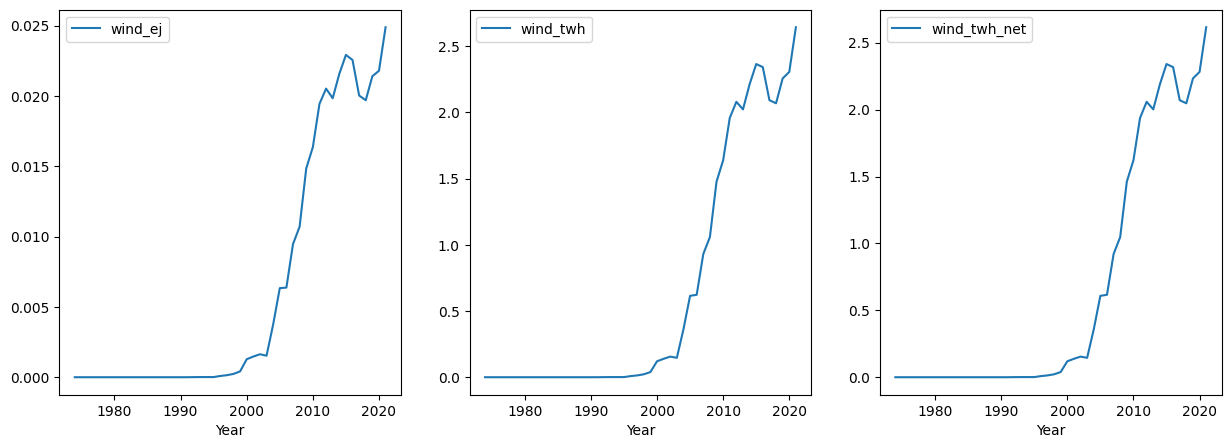

In [26]:
vrs = wind['Var'].unique()
f, axes = plt.subplots(ncols=3, sharex=True, figsize=(15, 5))

for ax, var in zip(axes, vrs):
    _ = wind.loc[wind['Var'] == var, :].plot(x='Year', y='Value', ax=ax, label=var)